In [4]:
from pathlib import Path
import os
import sys

CWD = Path.cwd().parent
SRC = CWD / 'src'

os.chdir(CWD)
sys.path.insert(0, SRC.as_posix())  # add script-path to PATH

# Mini-Batch Gradient Descent
### Random Point Cloud

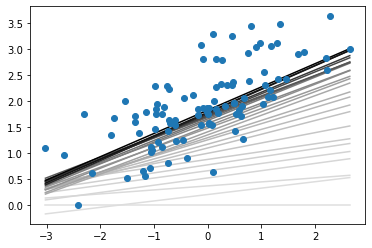

In [2]:
import numpy as np
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)

# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # compute errors
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    
    # compute steps
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    
    return W_new, b_new


# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef


if __name__ == "__main__":
    # perform gradient descent
    data = np.loadtxt('../data/batch_graddesc.csv', delimiter = ',')
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    # plot the results
    import matplotlib.pyplot as plt
    
    plt.figure()
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.scatter(X, y, zorder = 3)
    plt.show()

# Linear Regression (scikit-learn)
### Gapminder

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


bmi_life_data = pd.read_csv('data/bmi_and_life_expectancy.csv') 

bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

# Make a prediction using the model
# TODO: Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict(np.array([[21.07931]]))
laos_life_exp

array([[60.31564716]])

# Multiple Linear Regression
### Boston House Data

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the boston house-prices dataset 
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
# TODO: Fit the model and assign it to the model variable
model = LinearRegression()
model.fit(x, y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
# TODO: Predict housing price for the sample_house
prediction = model.predict(sample_house)
prediction

array([23.68284712])

# Polynomial Regression
#### Theory
Polynomial regression is a special case of linear regression. With the main idea of how do you select your features. Looking at the multivariate regression with 2 variables: x1 and x2. 

Linear regression will look like this: `y = a1 * x1 + a2 * x2`

Now you want to have a polynomial regression (let's make 2 degree polynomial). We will create a few additional features: x1\*x2, x1^2 and x2^2.

So we will get your 'linear regression': `y = a1 * x1 + a2 * x2 + a3 * x1*x2 + a4 * x1^2 + a5 * x2^2`

In [7]:
# TODO: Add import statements
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

train_data = pd.read_csv('data/polynomial_regression.csv')
train_data.sort_values(by=['Var_X'], inplace=True)

# Assign the data to predictor and outcome variables
# TODO: Load the data
X = train_data['Var_X'].values.reshape(-1, 1)  # -1 means guess the correct dimension automatically based on number of input values and the second given integer. E.g.: len(a) = 20; a.reshape(-1, 1) -> [[x1], [x2], ..., [x20]] | a.reshape(-1, 20) -> [x1, x2, ..., x20]
y = train_data['Var_Y'].values.reshape(-1, 1)

# Create polynomial features
# TODO: Create a PolynomialFeatures object, then fit and transform the
# predictor feature
poly_feat = PolynomialFeatures(degree = 4)
X_poly = poly_feat.fit_transform(X)

# Make and fit the polynomial regression model
# TODO: Create a LinearRegression object and fit it to the polynomial predictor
# features
poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)
prediction = poly_model.predict(X_poly)

First let's see what the input data looks like

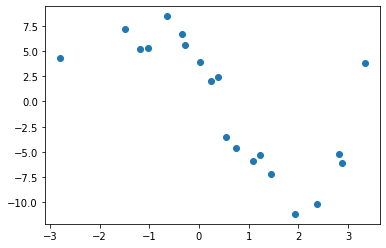

In [8]:
# Visualize the input data
plt.scatter(X, y)

Now let's have a look at the prediction results of the fitted regression when its applied to the input X-values

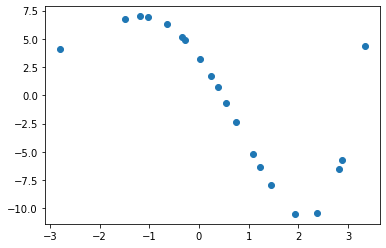

In [82]:
plt.scatter(X, prediction)

Finally we bring together the source data with our prediction result

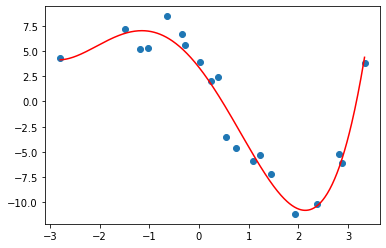

In [119]:
# compute many small intermediate steps between the minimum and maximum of 'x'
x_smooth = np.linspace(X.min(), X.max(), 500)

x_smooth_poly = poly_feat.fit_transform(x_smooth.reshape(-1, 1))
y_smooth = poly_model.predict(x_smooth_poly)

plt.plot(x_smooth, y_smooth, 'red')
plt.scatter(X, y)

### Alternative complete solution with scipy interpolate

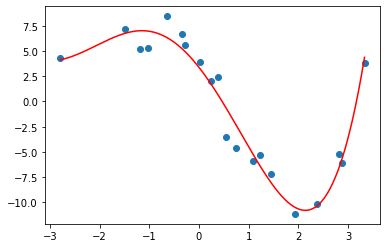

In [157]:
from scipy.interpolate import interp1d

# compute many small intermediate steps between the minimum and maximum of 'x'
x_smooth = np.linspace(X.min(), X.max(), 500)

# convert arrays from [[x1], ..., [xn]] to [x1, ..., xn] and create the interpolation function
f = interp1d(X.reshape(1, 20)[0], prediction.reshape(1, 20)[0], kind='cubic')
y_smooth=f(x_smooth)

plt.plot(x_smooth, y_smooth, 'red')
plt.scatter(X, y)

# Regularization Exercise

In [13]:
import pandas as pd
from sklearn.linear_model import Lasso

# Load data
data_path = 'data/regularization_exercise.csv'
train_data = pd.read_csv(data_path, header = None)

# Assign the data to predictor and outcome variables
X = train_data.iloc[:,:6]
y = train_data.iloc[:,6:]

# Lasso regularization is a L1 Regularization (non-squared coefficients added to error)
lasso_reg = Lasso()

# Fit the model.
lasso_reg.fit(X, y)

# Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

[ 0.          2.35793224  2.00441646 -0.05511954 -3.92808318  0.        ]


Compare these coefficients to a regression without regularization (especially coefficient 1 and 6 which are zero)

In [26]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)
print(linear_reg.coef_)

[[-6.19918532e-03  2.96325160e+00  1.98199191e+00 -7.86249920e-02
  -3.95818772e+00  9.30786141e+00]]


## Regularization with Normalization Exercise

In [50]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


# Assign the data to predictor and outcome variables
train_data = pd.read_csv('data/regularization_exercise.csv', header=None)
X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

# Create the standardization scaling object.
scaler = StandardScaler()

# Fit the standardization parameters and scale the data.
X_scaled = pd.DataFrame(scaler.fit_transform(X))

# Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# Fit the model.
lasso_reg.fit(X_scaled, y)

# Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

[  0.           3.90753617   9.02575748  -0.         -11.78303187
   0.45340137]


### EDA (Exploratory Data Analysis) on the Regularization with Normalization Exercise

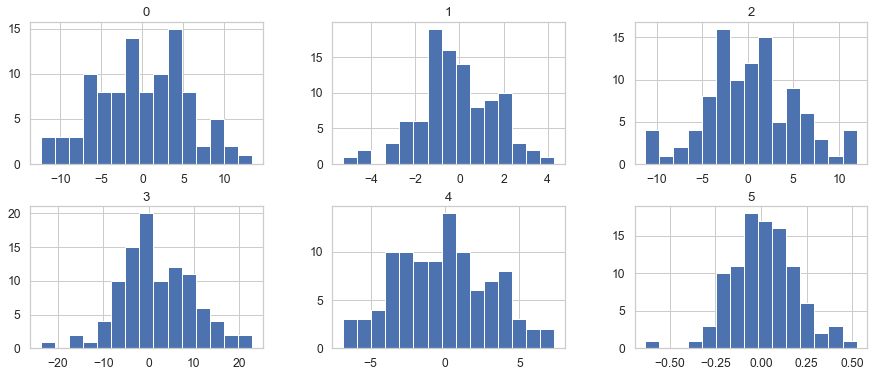

In [45]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
X.hist(bins=15, figsize=(15, 6), layout=(2, 3))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>]], dtype=object)

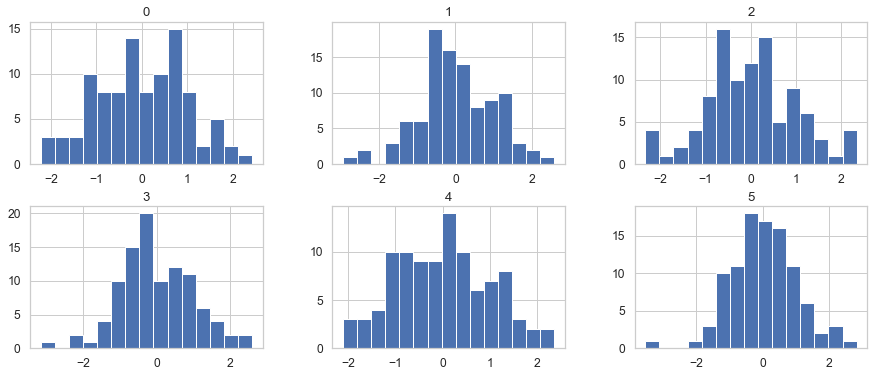

In [51]:
X_scaled.hist(bins=15, figsize=(15, 6), layout=(2, 3))

## Perceptron Algorithm

Create the algorithm

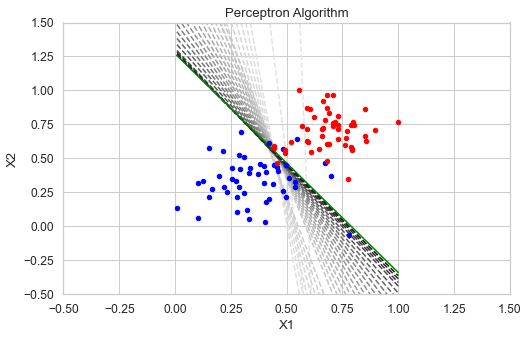

In [149]:
############
# Settings #
############
SEED = 42
LEARN = 0.01
EPOCHS = 30


########################
# Algorithm Definition #
########################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(SEED)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

# predict the result for a single input (X = Xn[i])
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# The perceptron trick
# data X (as a matrix [[x11, x21], [x1n, x2n]]),
# the labels y (format 1 and 0) (as an array),
# the weights W (as an array [[w11, w21], [w1n, w2n]]),
# the bias b (as an integer).
# update the weights and bias W, b, according to the perceptron algorithm,
# return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        # basically: if y[i] == 1 and y_hat == 0
        if y[i] - y_hat == 1:
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
            b += learn_rate
        # basically: if y[i] == 0 and y_hat == 1
        if y[i] - y_hat == -1:
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


#####################
# Run the algorithm #
#####################
train_data = pd.read_csv('data/perceptron_algorithm.csv', header=None)
X = np.asarray(train_data.iloc[:,:-1])
y = np.asarray(train_data.iloc[:,-1])

training_results = trainPerceptronAlgorithm(X, y, learn_rate=LEARN, num_epochs=EPOCHS)


####################
# Plot the results #
####################
fig, ax = plt.subplots()

X1 = X[:,0]
X2 = X[:,1]
X1_min = X1.min()
X1_max = X1.max()

counter = len(training_results)

for W, b in training_results:
    counter -= 1
    
    if counter == 0:
        color = 'green'
        style = '-'
    else:
        color = [1 - 0.92 ** counter for _ in range(3)]
        style = '--'
    
    ax.plot([X1_min, X1_max], [X1_min * W[0] + b[0], X1_max * W[0] + b[0]], color=color, linestyle=style)

batch1 = train_data[train_data.iloc[:,-1] == 1].iloc[:,:-1]
batch2 = train_data[train_data.iloc[:,-1] == 0].iloc[:,:-1]
batch1.plot.scatter(x=0, y=1, c='blue', ax=ax, zorder = 3)
batch2.plot.scatter(x=0, y=1, c='red', ax=ax, zorder = 3)

ax.axis([-0.5, 1.5, -0.5, 1.5])
ax.set_title('Perceptron Algorithm')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.show()

## Decision Trees

The accuracy is 1.0


(0.0, 1.0, 0.0, 1.0)

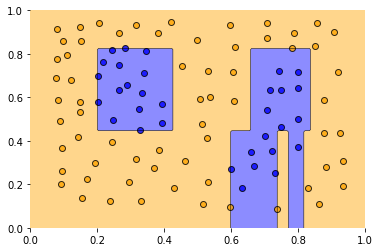

In [6]:
# Import statements 
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Read the data.
data = np.asarray(pd.read_csv('../data/decision_tree.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# Create the decision tree model and assign it to the variable model.
# You won't need to, but if you'd like, play with hyperparameters such
# as max_depth and min_samples_leaf and see what they do to the decision
# boundary.
model = DecisionTreeClassifier(max_depth=None,
                                min_samples_split=2,
                                min_samples_leaf=1)

# Fit the model.
model.fit(X, y)

# Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)

# Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y, y_pred)
print('The accuracy is', acc)

plot_decision_regions(X, y.astype(np.int32), model, markers='o', colors='blue,orange', legend=0)
plt.axis([0.0, 1.0, 0.0, 1.0])

### Train_test_split (Testing your models)

The accuracy is 0.9583333333333334


(0.0, 1.0, 0.0, 1.0)

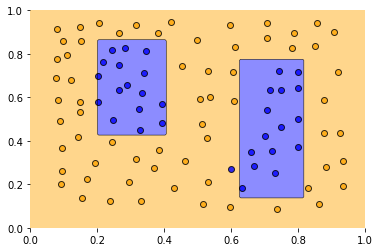

In [4]:
# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Import the train test split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Read the data.
data = np.asarray(pd.read_csv('../data/train_test_split.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# Use train test split to split your data 
# Use a test size of 25% and a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# TODO: Create the decision tree model and assign it to the variable model.
model = DecisionTreeClassifier()

# TODO: Fit the model to the training data.
model.fit(X_train,y_train)

# TODO: Make predictions on the test data
y_pred = model.predict(X_test)

# TODO: Calculate the accuracy and assign it to the variable acc. on the test data
acc = accuracy_score(y_test, y_pred)
print('The accuracy is', acc)

plot_decision_regions(X, y.astype(np.int32), model, markers='o', colors='blue,orange', legend=0)
plt.axis([0.0, 1.0, 0.0, 1.0])

### Learning Curves

(Logistic Regression) Underfitting = High Bias


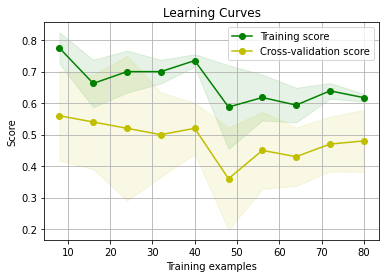

(Decision Tree) Just Right


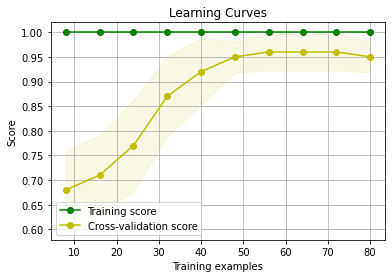

(SVM) Overfitting = High Variance


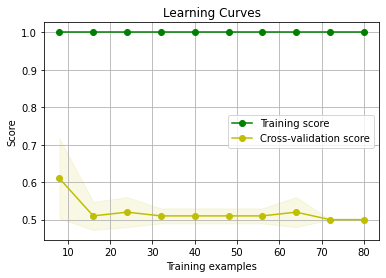

In [1]:
# Import, read, and split data
import pandas as pd
data = pd.read_csv('../data/learning_curves.csv')
import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from utils import randomize, draw_learning_curves

# TODO: Uncomment one of the three classifiers, and hit "Test Run"
# to see the learning curve. Use these to answer the quiz below.

### Logistic Regression
logistic_regression = LogisticRegression()

### Decision Tree
decision_tree = GradientBoostingClassifier()

### Support Vector Machine
svc = SVC(kernel='rbf', gamma=1000)

estimators = [logistic_regression, decision_tree, svc]
msg = ['(Logistic Regression) Underfitting = High Bias',
       '(Decision Tree) Just Right',
       '(SVM) Overfitting = High Variance']

X2, y2 = randomize(X, y)

for i, estimator in enumerate(estimators):
    print(msg[i])
    draw_learning_curves(X2, y2, estimator, 10)

Let's have a look at the boundary cuvers for each model

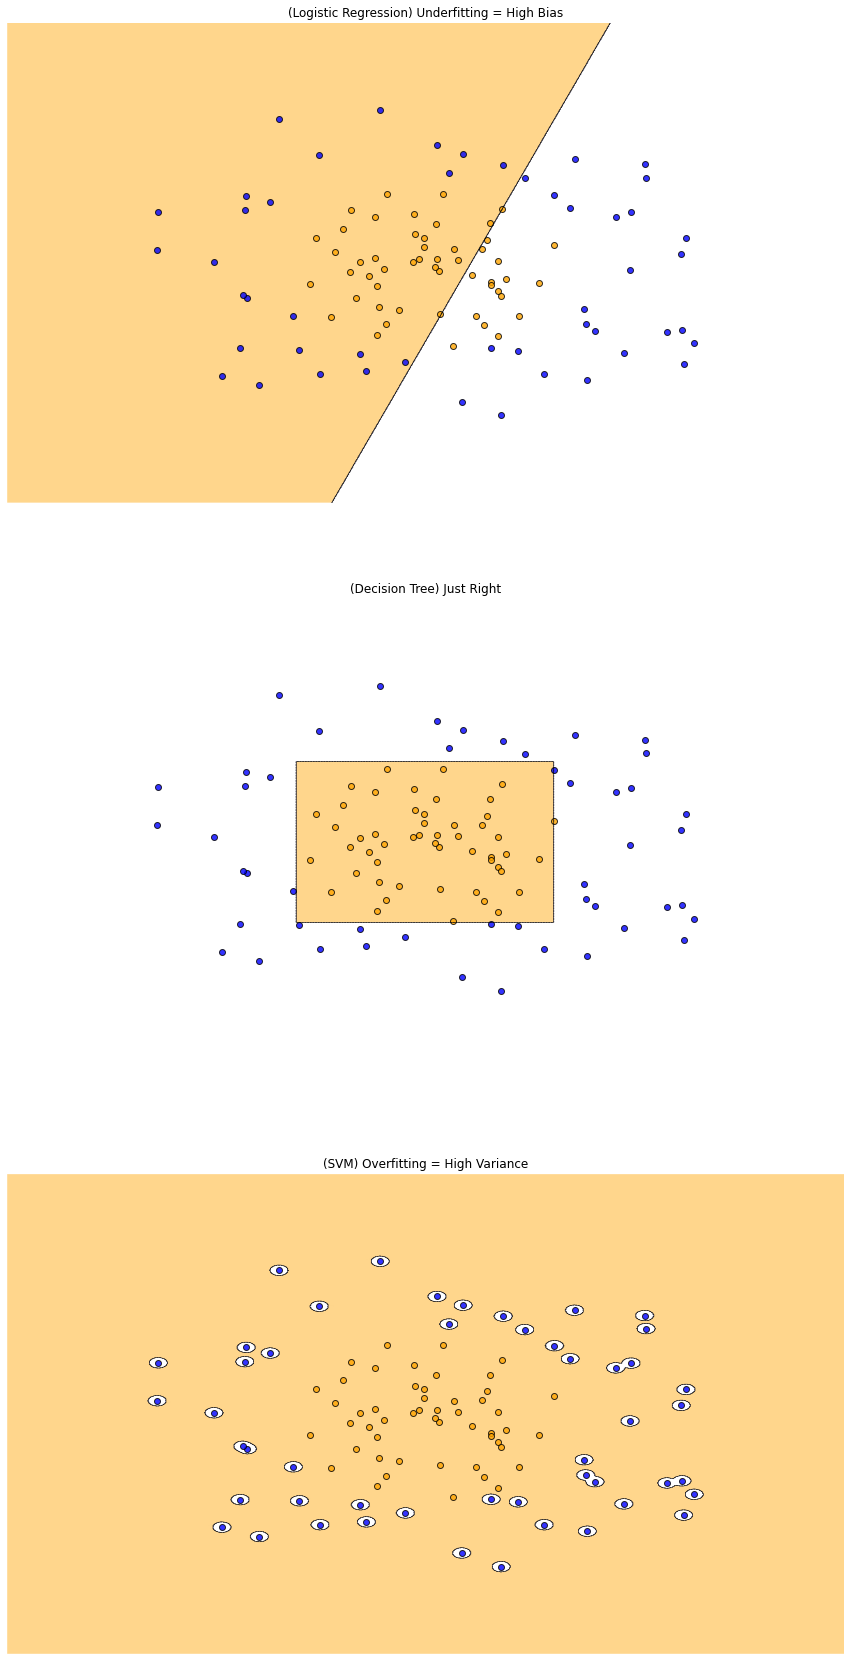

In [40]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(nrows=3, figsize=(15, 30))
for i, estimator in enumerate(estimators):
    ax[i].set_title(msg[i])
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].set_yticks([])
    ax[i].set_xticks([])
    estimator.fit(X, y)
    plot_decision_regions(X, y.astype(np.int32), estimator, markers='o',
                          colors='blue,orange', legend=0, ax=ax[i])